Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Activity**:|Prepare a Dataset for LSTM and CNN
<hr> | <hr>
**Name**         | Naga, Jamal
**Section** | CPE32S3
**Date Performed**: |May 08, 2024
**Date Submitted**: |May 11, 2024
**Instructor**: | Engr. Roman Richard
<hr> | <hr>


# Task 1: Load the dataset and examine it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# load time series dataset
hoa_11 = pd.read_csv('/content/drive/MyDrive/HOA 11/IBM_2006-01-01_to_2018-01-01.csv')

In [ ]:
hoa_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [ ]:
hoa_11.shape

(3020, 7)

In [ ]:
hoa_11.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
hoa_11.tail()

,Date,Open,High,Low,Close,Volume,Name
3015,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
3019,2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [ ]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(hoa_11.describe())


Basic statistics of the dataset:
              Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean    145.515545   146.681738   144.471597   145.617278  5.773301e+06
std      37.554946    37.613446    37.477641    37.529387  3.192831e+06
min      72.740000    73.940000    69.500000    71.740000  2.542560e+05
25%     116.405000   117.765000   115.490000   116.525000  3.622681e+06
50%     149.610000   150.330000   148.470000   149.315000  4.928852e+06
75%     178.445000   179.762500   177.330000   178.685000  6.965014e+06
max     215.380000   215.900000   214.300000   215.800000  3.077428e+07


**Observation:** The statistics suggest that IBM stock prices from 2006 to 2018 exhibited moderate volatility, with the opening and closing prices averaging around 145 and 146, respectively, and fluctuating within a range of approximately 72 to 215.

# Check for missing values.


In [ ]:
# Check for missing values in the dataset
hoa_11.isnull().sum()

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

**Observation:**
The dataset contains missing values in the "Open" and "Low" columns, with one missing value in each.

In [ ]:
# Impute missing values with the mean of their respective columns
hoa_11['Open'].fillna(hoa_11['Open'].mean(), inplace=True)
hoa_11['Low'].fillna(hoa_11['Low'].mean(), inplace=True)

# Verify that missing values have been handled
print("Missing values after handling:")
print(hoa_11.isnull().sum())

Missing values after handling:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


**Observation:** Here I used to fillna method to fill the missing values found in column Open and Low.

In [ ]:
import pandas as pd

hoa_11['Date'] = pd.to_datetime(hoa_11['Date'])

# Split the dataset into training and test sets based on the date
training_set = hoa_11[hoa_11['Date'] < '2017-01-01']
test_set = hoa_11[hoa_11['Date'] >= '2017-01-01']

# Verify the sizes of the training and test sets
print("Training set size:", training_set.shape)
print("Test set size:", test_set.shape)


Training set size: (2769, 7)
Test set size: (251, 7)


**Observation:** Here I splits the dataset into training and test sets based on a specified date ('2017-01-01').

# Task 3. Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

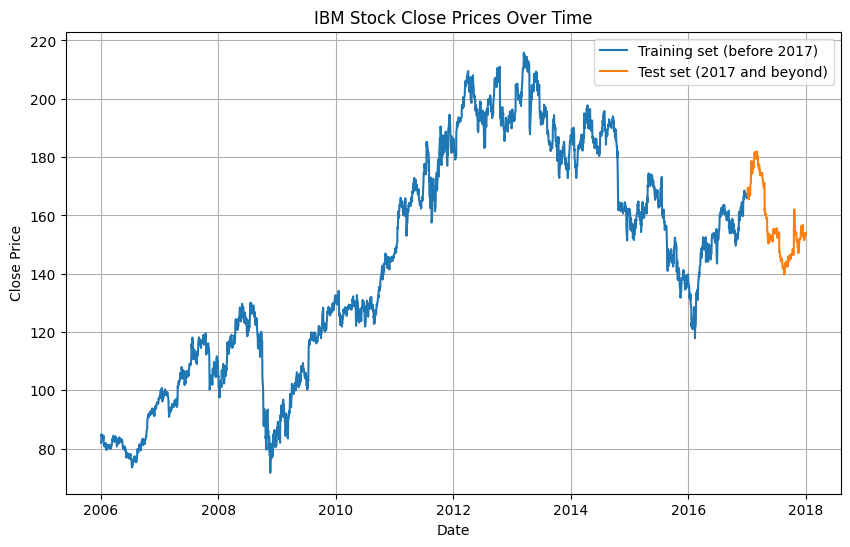

In [ ]:
import matplotlib.pyplot as plt

# Plot 'Close' prices for both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(training_set['Date'], training_set['Close'], label='Training set (before 2017)')
plt.plot(test_set['Date'], test_set['Close'], label='Test set (2017 and beyond)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM Stock Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

**Observation:** The graph shows IBM's stock price fluctuating, with both increases and decreases over time.

# Task 4. Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract numerical columns (excluding 'Date' if present)
numerical_columns = training_set.select_dtypes(include=['number']).columns

# Scale the numerical columns from 0 to 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set[numerical_columns])

# Convert the scaled array back to a DataFrame
training_set_scaled = pd.DataFrame(training_set_scaled, columns=numerical_columns)

# Print the first few rows of the scaled training set
print("Scaled training set:")
print(training_set_scaled.head())

Scaled training set:
       Open      High       Low     Close    Volume
0  0.068073  0.060651  0.078108  0.071637  0.351221
1  0.066321  0.060299  0.081699  0.070873  0.287408
2  0.060712  0.063116  0.079420  0.074691  0.197981
3  0.078589  0.078121  0.096064  0.091698  0.231473
4  0.079641  0.072626  0.095856  0.083229  0.185886


**Observation:** Here, I utilize MinMaxScaler to scale numerical values in the training set, excluding the categorical column 'ibm', ensuring all numerical columns are transformed within the range of 0 to 1.

# Task 5. LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.

In [ ]:
import numpy as np

# Define the number of timesteps
timesteps = 60

# Initialize empty lists for input (X) and output (y) sequences
X_train_lstm = []
y_train_lstm = []

# Iterate over the training set columns to create sequences
for i in range(timesteps, training_set_scaled.shape[0]):
    # Extract the sequence of timesteps
    X_train_lstm.append(training_set_scaled.iloc[i - timesteps:i, :].values)
    # Extract the output for the current timestep
    y_train_lstm.append(training_set_scaled.iloc[i, :].values)

# Convert the lists to NumPy arrays
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

# Print the shape of the data structure
print("(X):", X_train_lstm.shape)
print("(y):", y_train_lstm.shape)

(X): (2709, 60, 5)
(y): (2709, 5)


**Observation:** Here I created a code where it is a input-output sequences for a LSTM model by iterating over the scaled training dataset, where each input sequence consists of 60 timesteps of numerical features, and the corresponding output is the value at the next timestep. The output confirms the shape of the resulting NumPy arrays: (2709 sequences, each with 60 timesteps and 5 features) for input, and (2709 sequences, each with 5 features) for output.

# Task 6. Reshape the X_train for efficient modeling


In [ ]:
# Reshape X_train_lstm for efficient modeling
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], timesteps, X_train_lstm.shape[2])

# Print the shape of the reshaped array
print(X_train_lstm.shape)

(2709, 60, 5)



**Observation**: Here I reshapes the input sequences for efficient modeling by LSTM networks, adjusting the dimensions to (2709 sequences, each with 60 timesteps and 5 features), as confirmed by the output.

#CONCLUSION:

In this activity, I learned how to prepare a dataset for LSTM and CNN where in the first part I examined first the dataset and found out that there are missing values in the "Open" and "Low" columns, to solve that I used fillna method. After that I split the dataset into training and test sets based on a specified date. Then, I applied MinMaxScaler to normalize numerical columns, excluding the categorical column 'ibm', ensuring all numerical features are scaled within the range of 0 to 1. Subsequently, I constructed input-output sequences suitable for LSTM modeling, reshaping the data for efficient processing. In conclusion, this activity provided valuable insights into data preprocessing steps essential for LSTM and CNN time series forecasting.